In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
import os

In [62]:
# Carregando dados
file_path = os.path.join(os.getcwd(), 'datasets', 'Regressao_Polinomial.csv')
df = pd.read_csv(file_path, delimiter=',')

# Análise Exploratória

In [63]:
df

,X,Y
0,-2.000000,80.719587
1,-1.959596,70.171820
2,-1.919192,74.165193
3,-1.878788,48.018546
4,-1.838384,51.877748
...,...,...
95,1.838384,27.984713
96,1.878788,24.512449
97,1.919192,31.535195
98,1.959596,32.313269


In [64]:
df.shape

(100, 2)

In [65]:
df.dtypes

X    float64
Y    float64
dtype: object

In [66]:
df.isna().sum()

X    0
Y    0
dtype: int64

# Preparando o modelo

### Modelo Original

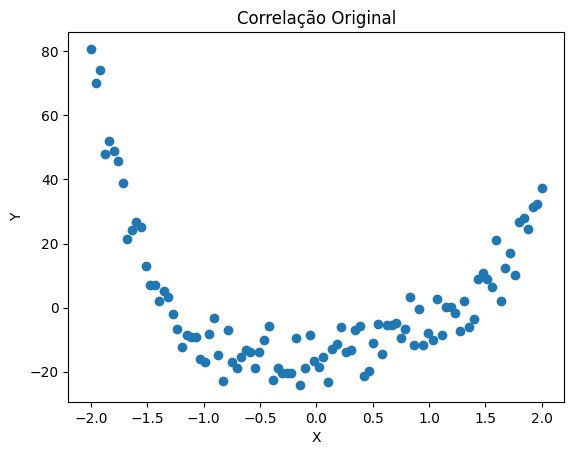

In [68]:
plt.scatter(df.X, df.Y)
plt.title('Correlação Original')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

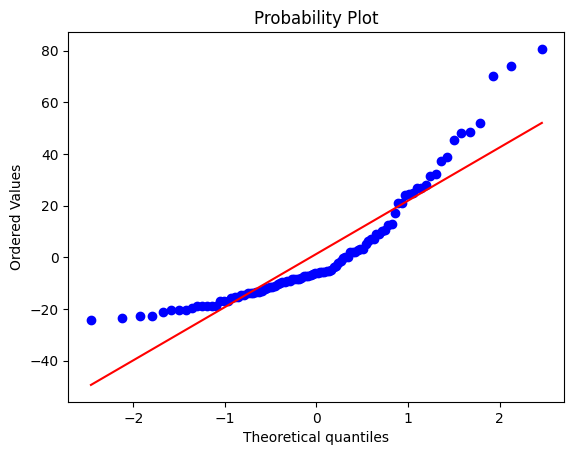

In [123]:
stats.probplot(df['Y'], dist='norm', plot=plt)
plt.show()

In [115]:
estatistica, p = stats.shapiro(df2['Y'])
print(estatistica)
print(p)

0.8405069708824158
5.371416644806004e-09


**Estatística (Statistic):** Este é o valor de estatística calculado pelo teste de normalidade de Shapiro-Wilk. Ele é usado para avaliar se os dados seguem uma distribuição normal. Quanto mais próximo o valor da estatística estiver de 1, mais próximo os dados estão da normalidade.

**p-valor (p-value):** O p-valor é a probabilidade de observar um valor de estatística igual ou mais extremo do que o observado, assumindo que a hipótese nula é verdadeira (ou seja, assumindo que os dados são provenientes de uma distribuição normal). Um p-valor baixo sugere que os dados não seguem uma distribuição normal.

---

In [129]:
coef, p = stats.pearsonr(df.X, df.Y)
print(coef)
print(p)

-0.18002972512487367
0.07307887918644816


**p-valor (p-value):** O p-valor é a probabilidade de observar uma correlação entre as variáveis que é tão extrema ou mais extrema do que a observada, assumindo que não existe correlação na população. Um p-valor baixo sugere que a correlação observada não é devida ao acaso.


Se o p-valor for menor que um nível de significância escolhido (geralmente 0.05), rejeitamos a hipótese nula em favor da hipótese alternativa. Isso significa que há evidências de uma correlação entre as variáveis.

Se o coeficiente de correlação é próximo de -1 ou 1, isso indica uma forte correlação. Se for próximo de 0, indica uma correlação mais fraca.

Por exemplo, se p < 0.05, podemos dizer que há uma correlação significativa entre as variáveis X e Y. O valor de coef indica a direção (positiva ou negativa) e a força da correlação.

---

In [128]:
regressao = smf.ols('Y ~ X', data = df).fit()
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.283
Date:                Mon, 18 Sep 2023   Prob (F-statistic):             0.0731
Time:                        22:13:30   Log-Likelihood:                -449.45
No. Observations:                 100   AIC:                             902.9
Df Residuals:                      98   BIC:                             908.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3679      2.188      0.625      0.5

### Modelo Grau 1

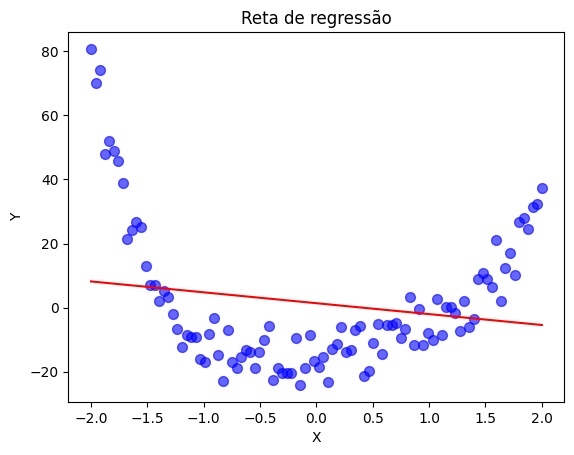

In [133]:
plt.scatter(y=df.Y, x=df.X, color='blue', s=50, alpha=0.6)
X_plot = np.linspace(-2, 2)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de regressão')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [180]:
def print_modelo(df, modelo, titulo, color, mae, mse):
    plt.title(titulo)
    plt.scatter(df.X, df.Y, c='gray')
    plt.plot(df.X, modelo(df.X), color=color)

    # Adicione as informações no canto do gráfico
    plt.text(0.7, 0.9, f'MAE: {mae:.2f}', transform=plt.gca().transAxes, fontsize=12)
    plt.text(0.7, 0.8, f'MSE: {mse:.2f}', transform=plt.gca().transAxes, fontsize=12)
    
    for i in range(5):
        y = 2+(i/10)
        plt.scatter(y, modelo(y), c = color)

    plt.show()

In [160]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Modelo Grau 2
modelo2 = np.poly1d(np.polyfit(df.X, df.Y, 2))
predict_y = modelo2(df.X)
mae2 = mean_absolute_error(df.Y, predict_y)
mse2 = mean_squared_error(df.Y, predict_y)

# Modelo Grau 3
modelo3 = np.poly1d(np.polyfit(df.X, df.Y, 3))
predict_y = modelo3(df.X)
mae3 = mean_absolute_error(df.Y, predict_y)
mse3 = mean_squared_error(df.Y, predict_y)

# Modelo Grau 4
modelo4 = np.poly1d(np.polyfit(df.X, df.Y, 4))
predict_y = modelo4(df.X)
mae4 = mean_absolute_error(df.Y, predict_y)
mse4 = mean_squared_error(df.Y, predict_y)

# Modelo Grau 5
modelo5 = np.poly1d(np.polyfit(df.X, df.Y, 4))
predict_y = modelo5(df.X)
mae5 = mean_absolute_error(df.Y, predict_y)
mse5 = mean_squared_error(df.Y, predict_y)

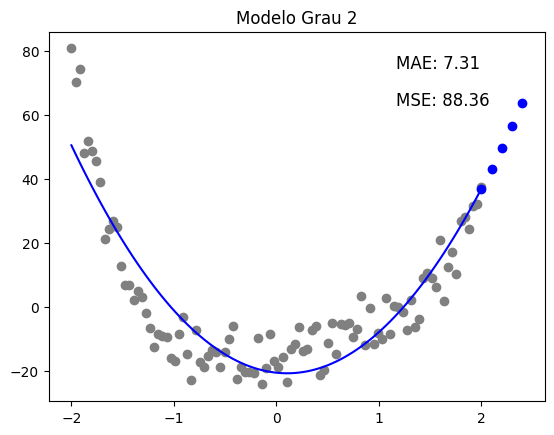

In [181]:
print_modelo(df, modelo2, titulo="Modelo Grau 2", color="blue", mae=mae2, mse=mse2)

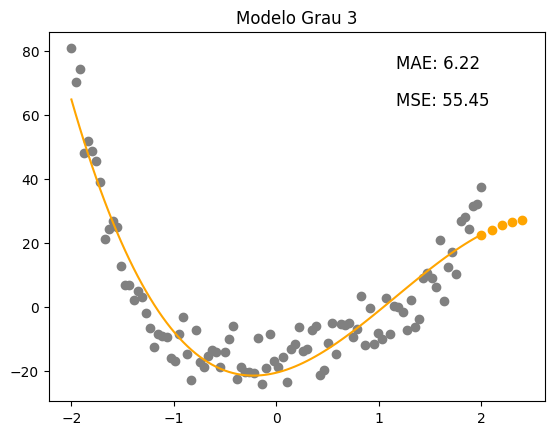

In [182]:
print_modelo(df, modelo3, titulo="Modelo Grau 3", color="orange", mae=mae3, mse=mse3)

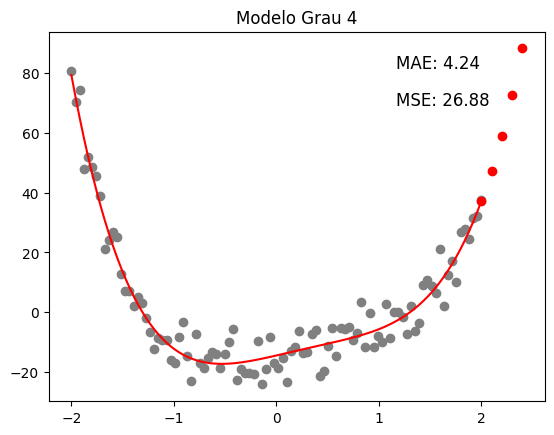

In [183]:
print_modelo(df, modelo4, titulo="Modelo Grau 4", color="red", mae=mae4, mse=mse4)

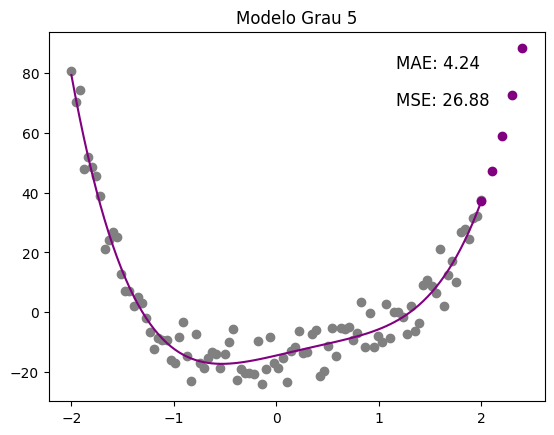

In [184]:
print_modelo(df, modelo5, titulo="Modelo Grau 5", color="purple", mae=mae5, mse=mse5)

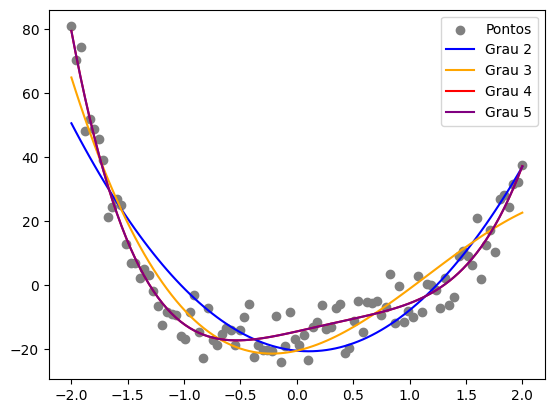

In [168]:
plt.scatter(df.X, df.Y, c='gray', label='Pontos')
plt.plot(df.X, modelo2(df.X), color='blue', label='Grau 2')
plt.plot(df.X, modelo3(df.X), color='orange', label='Grau 3')
plt.plot(df.X, modelo4(df.X), color='red', label='Grau 4')
plt.plot(df.X, modelo4(df.X), color='purple', label='Grau 5')
plt.legend()
plt.show()

## Conclusão

Ao aumentarmos o grau do nosso modelo, conseguimos ver que a partir do quarto grau, não há diferença quando utilizamos os comparativos baseados em MAE e MSE. O que indica que o modelo que utiliza o grau 4 é o ideal neste caso, utilizando o suficiente para termos uma predição aceitável em relação ao modelo em questão

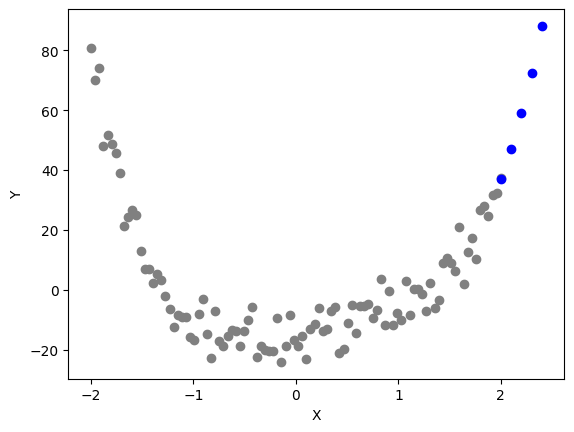

In [178]:
# Gráfico com valor previsto
plt.scatter(df.X, df.Y, c = "gray")
plt.xlabel("X")
plt.ylabel("Y")
for i in range(5):
    y = 2+(i/10)
    plt.scatter(y, modelo4(y), c = "blue")
plt.show()